# CAPSTONE PROJECT :

## BUSINESS PROBLEM UNDERSTANDING :
     --Company wants to automate the loan eligibility process based on costumer details provided by filling the online application. The details are Gender, Marital status, Dependents, Education, Self_employed, Applicant income,Coapplicant income, Loan amount, Loan amount term, Credit history, Property area. To automate this process, by using the details which are given predict the eligibility of a loan for the customer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("LoanData.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## DATA UNDERSTANDING :--

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df["Loan_ID"].nunique()

614

In [8]:
df.drop("Loan_ID",axis=1,inplace=True)

In [9]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [16]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [17]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [18]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [19]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [20]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [21]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## Data Exploration :

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


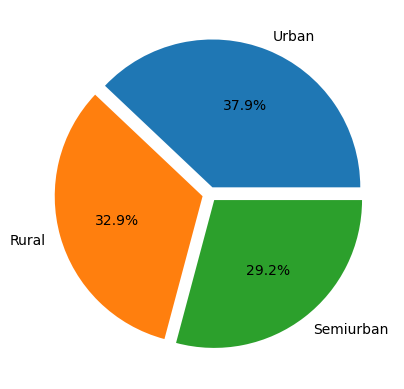

In [26]:
plt.pie(x=df["Property_Area"].value_counts(),labels=df["Property_Area"].unique(),
        autopct="%0.1f%%",explode =(0.05,0.05,0.05))
plt.show()

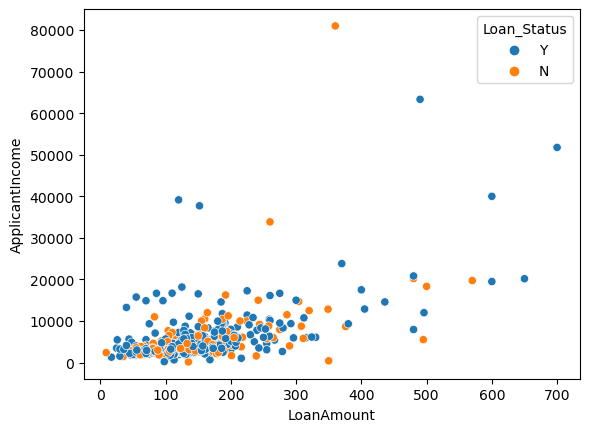

In [29]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',data=df,hue='Loan_Status')
plt.show()

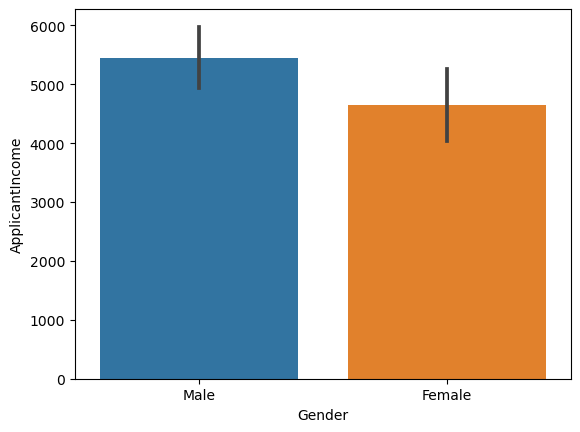

In [31]:
sns.barplot(x="Gender",y="ApplicantIncome",data=df)
plt.show()

In [39]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


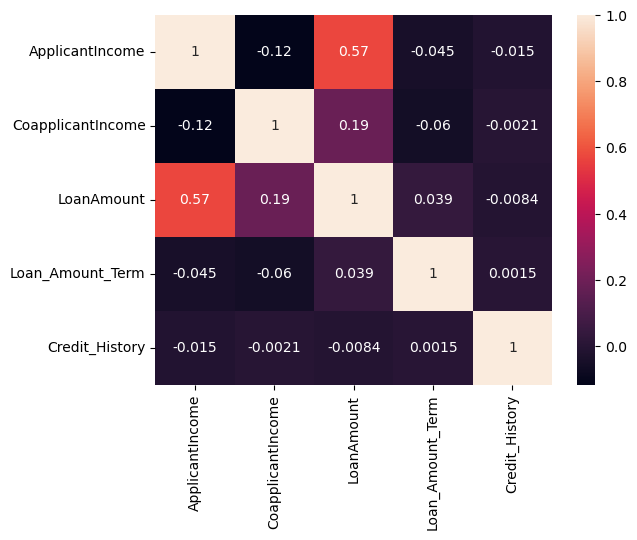

In [40]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## DATA PREPROCESSING :--

## DATA CLEANING

In [41]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
df.isnull().sum() / len(df)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [43]:
# Dependents should be in discrete 

df["Dependents"] = df["Dependents"].replace("3+",3)
df["Dependents"].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [44]:
# FILLING THE MISSING VALUES BY MEANS OF MODE :-------

df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)



In [45]:
df["Dependents"].fillna(0,inplace=True)
df["Dependents"]=df["Dependents"].astype("int")
df["Dependents"].unique()

array([0, 1, 2, 3])

In [46]:
# CONVERT STRING TO INT :

df["Credit_History"].fillna(0,inplace=True)
df["Credit_History"]=df["Credit_History"].astype("int")
df["Credit_History"].unique()


array([1, 0])

In [47]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
# CLASIFIES THE GIVEN VARIABLES :

continous = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

discrete_categorical = df[['Gender', 'Married', 'Education',
                          'Self_Employed','Property_Area','Loan_Status']]

discrete_count = df[['Dependents','Loan_Amount_Term','Credit_History']]

In [51]:
print(continous.describe())
print("====================================================================")
print(discrete_categorical.describe())
print("====================================================================")
print(discrete_count.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       578.000000         578.000000  578.000000
mean       5435.138408        1640.482561  147.143599
std        6229.382997        2993.270767   86.342523
min         150.000000           0.000000    9.000000
25%        2890.250000           0.000000  100.000000
50%        3812.500000        1211.500000  128.000000
75%        5795.000000        2281.000000  168.000000
max       81000.000000       41667.000000  700.000000
       Gender Married Education Self_Employed Property_Area Loan_Status
count     578     578       578           578           578         578
unique      2       2         2             2             3           2
top      Male     Yes  Graduate            No     Semiurban           Y
freq      472     377       457           501           225         403
       Dependents  Loan_Amount_Term  Credit_History
count  578.000000        578.000000      578.000000
mean     0.756055        342.145329        0.77854

## DATA WRANGLING 

***CHECK FOR OUTLEIRS***

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             578 non-null    object 
 1   Married            578 non-null    object 
 2   Dependents         578 non-null    int32  
 3   Education          578 non-null    object 
 4   Self_Employed      578 non-null    object 
 5   ApplicantIncome    578 non-null    int64  
 6   CoapplicantIncome  578 non-null    float64
 7   LoanAmount         578 non-null    float64
 8   Loan_Amount_Term   578 non-null    float64
 9   Credit_History     578 non-null    int32  
 10  Property_Area      578 non-null    object 
 11  Loan_Status        578 non-null    object 
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 54.2+ KB


In [53]:
# SKEWNESS THE COUNT VARIABLES :----

print(continous.skew())

ApplicantIncome      6.511168
CoapplicantIncome    7.418367
LoanAmount           2.649577
dtype: float64


### FEATURE TRANSFORMATION :---

In [54]:
# AFTER CONVERTING SKEW TO NORMAL DATA :

print("===========SKEWNESS============")

df["ApplicantIncome"] = np.log(df['ApplicantIncome']+0.001)
print("APPLICANTINCOME :", df["ApplicantIncome"].skew())

df["CoapplicantIncome"] = np.log(df["CoapplicantIncome"]+0.001)
print("COAPPLICANTINCOME :", df["CoapplicantIncome"].skew())

df["LoanAmount"] = np.log(df["LoanAmount"]+0.001)
print("LOAN AMOUNT :",df["LoanAmount"].skew())

===========SKEWNESS============
APPLICANTINCOME : 0.4661022193844673
COAPPLICANTINCOME : -0.2152493952340374
LOAN AMOUNT : -0.20785187415099493


In [55]:
df.skew()

Dependents           0.986828
ApplicantIncome      0.466102
CoapplicantIncome   -0.215249
LoanAmount          -0.207852
Loan_Amount_Term    -2.364832
Credit_History      -1.345160
dtype: float64

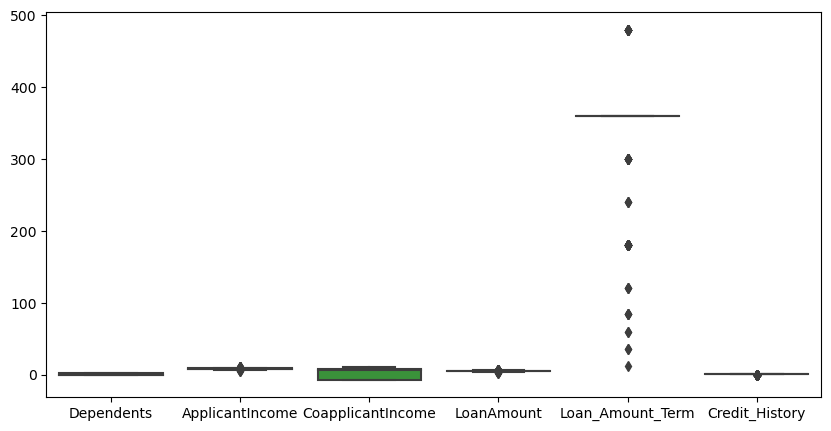

In [56]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(df)
plt.show()

In [57]:
# CHECKING OUTLIERS :---

Q1 = df["ApplicantIncome"].quantile(0.25)
print("Q1 :",Q1)

Q3 = df["ApplicantIncome"].quantile(0.75)
print("Q3 :",Q3)

IQR = Q3 - Q1
print("IQR :",IQR)

lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

df[(df["ApplicantIncome"]<lower_limit) | (df["ApplicantIncome"]>upper_limit)].index

Q1 : 7.969098348138499
Q3 : 8.664749810380414
IQR : 0.6956514622419148


Int64Index([ 77, 126, 130, 155, 171, 183, 185, 188, 216, 308, 333, 369, 409,
            443, 467, 468, 475, 478, 487, 493, 500, 506, 525, 534, 561, 572,
            600],
           dtype='int64')

In [58]:
# CHECKING OUTLIERS :---

Q1 = df["CoapplicantIncome"].quantile(0.25)
print("Q1 :",Q1)

Q3 = df["CoapplicantIncome"].quantile(0.75)
print("Q3 :",Q3)

IQR = Q3 - Q1
print("IQR :",IQR)

lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

df[(df["CoapplicantIncome"]<lower_limit) | (df["CoapplicantIncome"]>upper_limit)]

Q1 : -6.907755278982137
Q3 : 7.732368506148735
IQR : 14.640123785130871


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


## MODELING 

## ML Alogithm1:-  LOGISTIC REGRESSION :----

In [59]:
print("=============LOGISTIC REGRESSION================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=0)

# MODELLING :---

from sklearn.linear_model import LogisticRegression
log_base = LogisticRegression()
log_base.fit(x_train,y_train)

# PREDICTION :----

ypred_train = log_base.predict(x_train)
ypred_test = log_base.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(log_base,X,y,cv=5).mean())



=============LOGISTIC REGRESSION================
TRAIN ACCURACY : 0.7597402597402597
TEST ACCURACY : 0.7672413793103449
CROSS VALIDATION SCORE : 0.7579010494752623


**IDENTIFYING THE BEST RANDOM VALUE**

In [60]:
print("=============LOGISTIC REGRESSION================")

train = []
test = []
cv = []

for i in range(1,50):
    
    # X & Y FRAMING :--

    X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
    y = df["Loan_Status"]

    # TRAIN TEST SPLIT :--------

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                    random_state=i)

    # MODELLING :---

    from sklearn.linear_model import LogisticRegression
    log_base = LogisticRegression()
    log_base.fit(x_train,y_train)

    # PREDICTION :----

    ypred_train = log_base.predict(x_train)
    ypred_test = log_base.predict(x_test)

    # EVALUATION :---

    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,ypred_train))
    test.append(accuracy_score(y_test,ypred_test))

    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(log_base,X,y,cv=5).mean())

model = pd.DataFrame({"Train":train,"Test":test,"CV":cv})
em = model[abs(model["Train"] - model["Test"]<=0.05) &
             abs(model["Train"] - model["CV"]<=0.05)]
print("BEST RANDOM NUMBER :", em[em["Test"] == em["Test"].max()].index.to_list()[0])


=============LOGISTIC REGRESSION================
BEST RANDOM NUMBER : 8


## Final Logistic model

In [62]:
print("=============LOGISTIC REGRESSION================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.linear_model import LogisticRegression
log_base = LogisticRegression()
log_base.fit(x_train,y_train)

# PREDICTION :----

ypred_train = log_base.predict(x_train)
ypred_test = log_base.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

print("==================CONFUSION MATRIX========================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("=================CLASSIFICATION REPORT====================")
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))



=============LOGISTIC REGRESSION================
TRAIN ACCURACY : 0.7554112554112554
TEST ACCURACY : 0.7672413793103449
==================CONFUSION MATRIX========================
[[15 20]
 [ 7 74]]
=================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           N       0.68      0.43      0.53        35
           Y       0.79      0.91      0.85        81

    accuracy                           0.77       116
   macro avg       0.73      0.67      0.69       116
weighted avg       0.76      0.77      0.75       116



**Cross Validation**

In [63]:
from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(log_base,X,y,cv=5).mean())

CROSS VALIDATION SCORE : 0.7579010494752623


## ML Algorithm 2:- KNN CODE 

In [64]:
print("=============KNN CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# PREDICTION :---

ypred_train = knn.predict(x_train)
ypred_test = knn.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(knn,X,y,cv=5,
                                                 scoring="accuracy").mean())

=============KNN CODE================
TRAIN ACCURACY : 0.7770562770562771
TEST ACCURACY : 0.6896551724137931
CROSS VALIDATION SCORE : 0.7127586206896551


### HYPERPARAMETER TUNING/ OPTIMIZATION 

In [65]:
from sklearn.model_selection import GridSearchCV
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(1,30))}
knn_gm = GridSearchCV(estimator,param_grid,cv=5)
knn_gm.fit(x_train,y_train)
knn_gm.best_params_

{'n_neighbors': 10}

## FINAL KNN CODE :-

In [68]:
print("=============KNN CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

# PREDICTION :---

ypred_train = knn.predict(x_train)
ypred_test = knn.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))


print("================CONFUSION MATRIX=====================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("===============CLASSIFICATION RREPORT===============")
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

=============KNN CODE================
TRAIN ACCURACY : 0.7619047619047619
TEST ACCURACY : 0.7413793103448276
================CONFUSION MATRIX=====================
[[10 25]
 [ 5 76]]
===============CLASSIFICATION RREPORT===============
              precision    recall  f1-score   support

           N       0.67      0.29      0.40        35
           Y       0.75      0.94      0.84        81

    accuracy                           0.74       116
   macro avg       0.71      0.61      0.62       116
weighted avg       0.73      0.74      0.70       116



### Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(knn,X,y,cv=5,
                                                 scoring="accuracy").mean())


CROSS VALIDATION SCORE : 0.7058620689655173


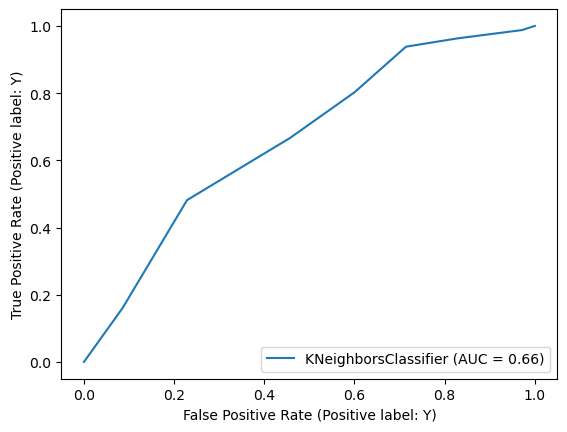

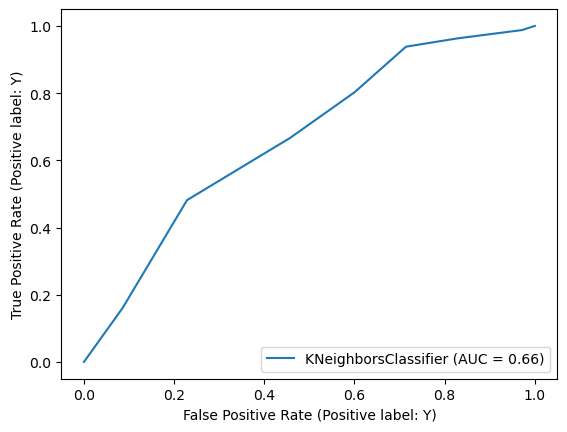

In [70]:
from sklearn.metrics import RocCurveDisplay
roc = RocCurveDisplay.from_estimator(knn,x_test,y_test)
roc.plot()
plt.show()

## ML Algorithm 3:- SVM CODE 

In [71]:
print("=============SVM CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

# PREDICTION :----

ypred_train = svc.predict(x_train)
ypred_test = svc.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))


print("=============CONFUSION MATRIX===============")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("=============CLASSIFICATION REPORT===============")
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))     

=============SVM CODE================
TRAIN ACCURACY : 0.696969696969697
TEST ACCURACY : 0.6982758620689655
=============CONFUSION MATRIX===============
[[ 0 35]
 [ 0 81]]
=============CLASSIFICATION REPORT===============
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        35
           Y       0.70      1.00      0.82        81

    accuracy                           0.70       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.49      0.70      0.57       116



### Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(svc,X,y,cv=5).mean())


CROSS VALIDATION SCORE : 0.6972263868065968


### HYPERPARAMETER TUNING/OPTIMIZATION

In [75]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()
param_grid = {"C":list(range(1,10)),
              "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}
svm_model = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
svm_model.fit(x_train,y_train)
svm_model.best_params_

{'C': 1, 'kernel': 'linear'}

## FINAL SVM CODE :--

In [76]:
print("=============SVM CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.svm import SVC
svc = SVC(C = 1,kernel = "linear")
svc.fit(x_train,y_train)

# PREDICTION :----

ypred_train = svc.predict(x_train)
ypred_test = svc.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(svc,X,y,cv=5).mean())

print("=============CONFUSION MATRIX===============")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("=============CLASSIFICATION REPORT===============")
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))     

=============SVM CODE================
TRAIN ACCURACY : 0.7640692640692641
TEST ACCURACY : 0.7758620689655172
CROSS VALIDATION SCORE : 0.7665217391304348
=============CONFUSION MATRIX===============
[[16 19]
 [ 7 74]]
=============CLASSIFICATION REPORT===============
              precision    recall  f1-score   support

           N       0.70      0.46      0.55        35
           Y       0.80      0.91      0.85        81

    accuracy                           0.78       116
   macro avg       0.75      0.69      0.70       116
weighted avg       0.77      0.78      0.76       116



## ML Algorithm 4:- DECISION TREE :--

In [77]:
print("=============DECISION TREE CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :--

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

# PREDICTION :--

ypred_train = dt_model.predict(x_train)
ypred_test = dt_model.predict(x_test)

# EVALUATION :---
from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))


print("=================CONFUSION MATRICS======================")

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("=================CLASIFICATION REPORT====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

=============DECISION TREE CODE================
TRAIN ACCURACY : 1.0
TEST ACCURACY : 0.5948275862068966
=================CONFUSION MATRICS======================
[[13 22]
 [25 56]]
=================CLASIFICATION REPORT====================
              precision    recall  f1-score   support

           N       0.34      0.37      0.36        35
           Y       0.72      0.69      0.70        81

    accuracy                           0.59       116
   macro avg       0.53      0.53      0.53       116
weighted avg       0.60      0.59      0.60       116



### Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(dt_model,X,y,cv=5).mean())

CROSS VALIDATION SCORE : 0.6453073463268366


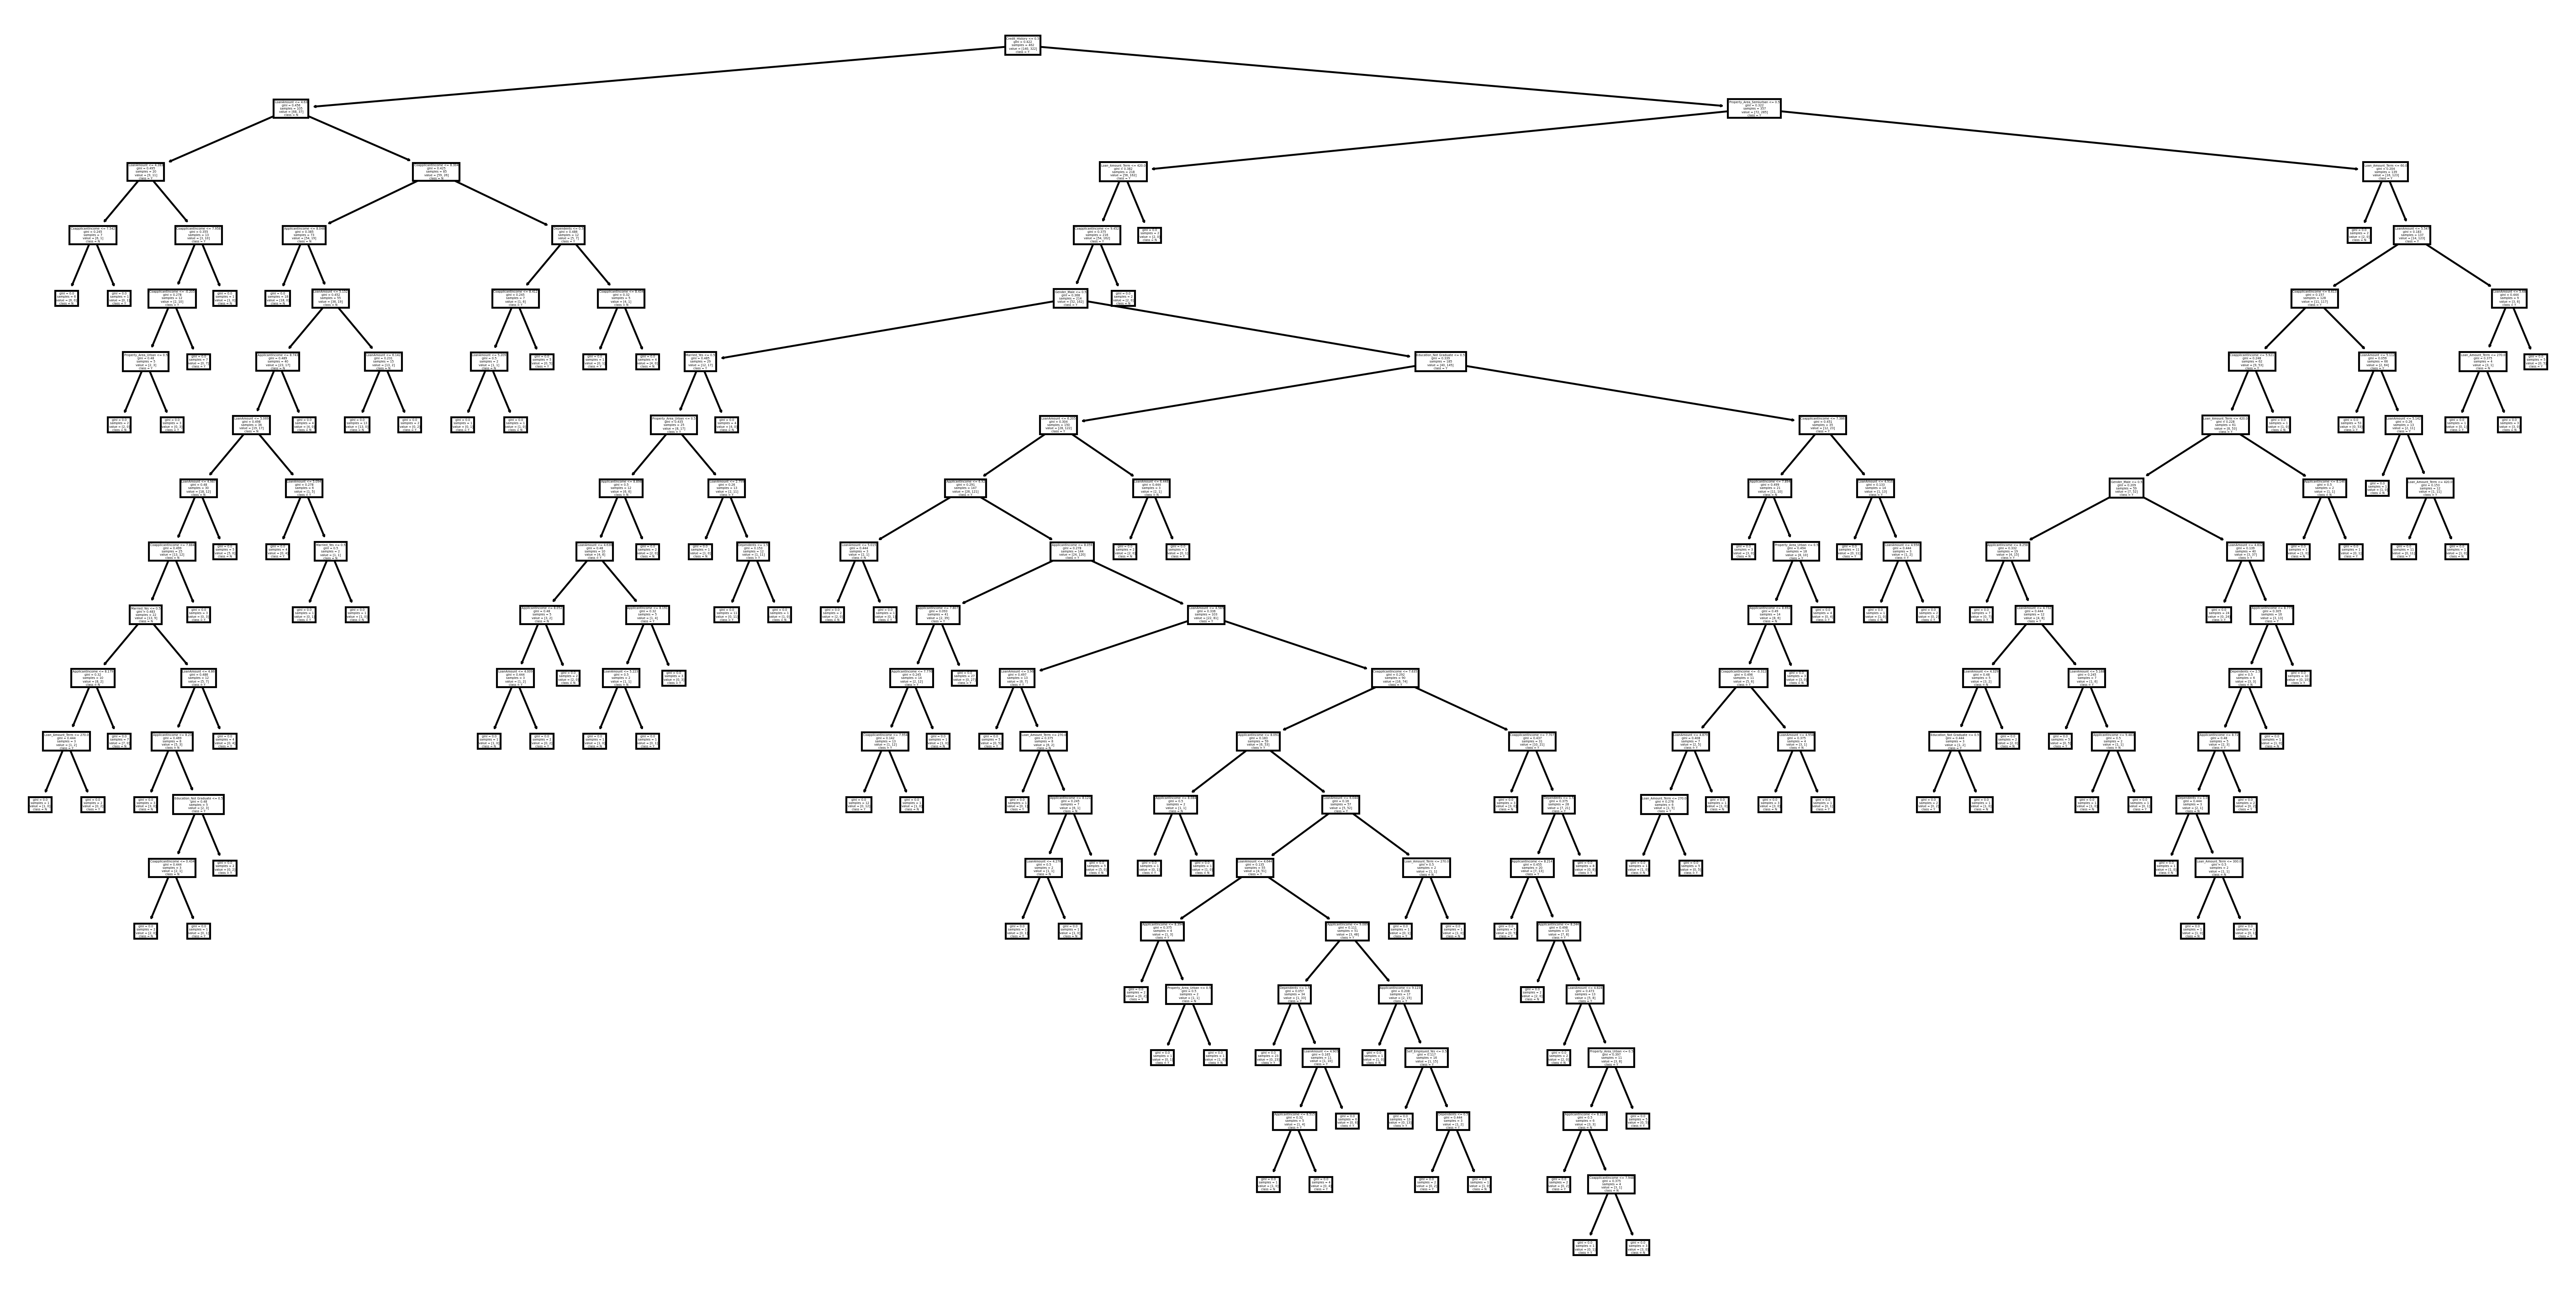

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12),dpi=300)

plot_tree(dt_model,
          feature_names=['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
          class_names=['N', 'Y'])

plt.show()

### HYPERPARAMETER TUNING/OPTIMIZATION

In [80]:
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()
param_grid = {"criterion":["gini", "entropy"],"max_depth":[1,2,3,4,5]}
dt_gm = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
dt_gm.fit(x_train,y_train)
dt_gm.best_params_

{'criterion': 'gini', 'max_depth': 1}

### Dimension Reduction

In [81]:
imp=dt_gm.best_estimator_.feature_importances_

In [82]:
feats = pd.DataFrame(data=imp,index=X.columns,
                     columns=["Feature Importance"])
X_imp=feats[feats["Feature Importance"]>0].index.to_list()
X_imp

['Credit_History']

## FINAL DECISIONTREE CODE :-

In [83]:
print("=============DECISION TREE CODE================")

# X & Y FRAMING :--

X_new = X[X_imp]
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,y,train_size=0.8,
                                                random_state=8)

# MODELLING :--

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 1)
dt_model.fit(x_train,y_train)

# PREDICTION :--

ypred_train = dt_model.predict(x_train)
ypred_test = dt_model.predict(x_test)

# EVALUATION :---
from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(dt_model,X,y,cv=5).mean())

print("=================CONFUSION MATRICS======================")

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("=================CLASIFICATION REPORT====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

=============DECISION TREE CODE================
TRAIN ACCURACY : 0.7640692640692641
TEST ACCURACY : 0.7758620689655172
CROSS VALIDATION SCORE : 0.7665217391304348
=================CONFUSION MATRICS======================
[[16 19]
 [ 7 74]]
=================CLASIFICATION REPORT====================
              precision    recall  f1-score   support

           N       0.70      0.46      0.55        35
           Y       0.80      0.91      0.85        81

    accuracy                           0.78       116
   macro avg       0.75      0.69      0.70       116
weighted avg       0.77      0.78      0.76       116



## ML Algorithm 5:- RANDOM FOREST :---

In [84]:
print("=============RANDOM FOREST CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

# PREDICTION :---

ypred_train = rfc.predict(x_train)
ypred_test = rfc.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))


print("=======================CONFUSION MATRIX=========================")

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("======================CLASSIFICATION REPORT=====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

=============RANDOM FOREST CODE================
TRAIN ACCURACY : 1.0
TEST ACCURACY : 0.7241379310344828
=======================CONFUSION MATRIX=========================
[[12 23]
 [ 9 72]]
======================CLASSIFICATION REPORT=====================
              precision    recall  f1-score   support

           N       0.57      0.34      0.43        35
           Y       0.76      0.89      0.82        81

    accuracy                           0.72       116
   macro avg       0.66      0.62      0.62       116
weighted avg       0.70      0.72      0.70       116



### Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(rfc,X,y,cv=5).mean())

CROSS VALIDATION SCORE : 0.7335682158920539


### HYPERPARAMETER TUNING/OPTIMIZATION

In [86]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestClassifier()
param_grid = {"n_estimators":list(range(1,40))}
rfc_model = GridSearchCV(estimator,param_grid,cv=5)
rfc_model.fit(x_train,y_train)
rfc_model.best_params_

{'n_estimators': 31}

### Dimension Reduction

In [87]:
rfc_model.best_estimator_.feature_importances_

array([0.05816164, 0.24213345, 0.13164129, 0.20455259, 0.04370237,
       0.14211945, 0.02895897, 0.02889962, 0.02970466, 0.01792296,
       0.04205315, 0.03014987])

## Final Random Forest Model :-----

In [88]:
print("=============RANDOM FOREST CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"]

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=31)
rfc.fit(x_train,y_train)

# PREDICTION :---

ypred_train = rfc.predict(x_train)
ypred_test = rfc.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print("CROSS VALIDATION SCORE :",cross_val_score(rfc,X,y,cv=5).mean())

print("=======================CONFUSION MATRIX=========================")

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("======================CLASSIFICATION REPORT=====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

=============RANDOM FOREST CODE================
TRAIN ACCURACY : 0.9978354978354979
TEST ACCURACY : 0.7327586206896551
CROSS VALIDATION SCORE : 0.7214842578710645
=======================CONFUSION MATRIX=========================
[[12 23]
 [ 8 73]]
======================CLASSIFICATION REPORT=====================
              precision    recall  f1-score   support

           N       0.60      0.34      0.44        35
           Y       0.76      0.90      0.82        81

    accuracy                           0.73       116
   macro avg       0.68      0.62      0.63       116
weighted avg       0.71      0.73      0.71       116



## ML Algorithm 6:- ADABOOST CLASSIFIER :---

In [89]:
print("=============ADABOOST CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
adc.fit(x_train,y_train)

# PREDICTION :--

ypred_train = adc.predict(x_train)
ypred_test = adc.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))


print("=====================CONFUSION MATRIX========================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("====================CLASSIFICATION REPORT====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

print("==========ROC_AUC_SCORE====================")

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred_test))

=============ADABOOST CODE================
TRAIN ACCURACY : 0.8051948051948052
TEST ACCURACY : 0.75
=====================CONFUSION MATRIX========================
[[13 22]
 [ 7 74]]
====================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           0       0.65      0.37      0.47        35
           1       0.77      0.91      0.84        81

    accuracy                           0.75       116
   macro avg       0.71      0.64      0.65       116
weighted avg       0.73      0.75      0.73       116

==========ROC_AUC_SCORE====================
0.6425044091710759


### Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION SCORE:',cross_val_score(adc,x_train,y_train,cv=5,
                                               scoring="accuracy").mean())

CROSS VALIDATION SCORE: 0.7207106124357177


### HYPERPARAMETER TUNING/OPTIMIZATION

In [92]:
from sklearn.model_selection import GridSearchCV
estimator = AdaBoostClassifier()
param_grid = {"n_estimators":list(range(1,20)),
              "learning_rate":[0.1,0.3,0.5,0.7,0.9,1]}
adc_model = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy",
                         error_score='raise')
adc_model.fit(x_train,y_train)
adc_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 1}

## Final Adaboost model 

In [93]:
print("=============ADABOOST CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 1)
adc.fit(x_train,y_train)

# PREDICTION :--

ypred_train = adc.predict(x_train)
ypred_test = adc.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION SCORE:',cross_val_score(adc,x_train,y_train,cv=5,
                                               scoring="accuracy").mean())

print("=====================CONFUSION MATRIX========================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("====================CLASSIFICATION REPORT====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

print("==========ROC_AUC_SCORE====================")

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred_test))

=============ADABOOST CODE================
TRAIN ACCURACY : 0.7640692640692641
TEST ACCURACY : 0.7758620689655172
CROSS VALIDATION SCORE: 0.7641421224871434
=====================CONFUSION MATRIX========================
[[16 19]
 [ 7 74]]
====================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           0       0.70      0.46      0.55        35
           1       0.80      0.91      0.85        81

    accuracy                           0.78       116
   macro avg       0.75      0.69      0.70       116
weighted avg       0.77      0.78      0.76       116

==========ROC_AUC_SCORE====================
0.6853615520282187


## ML Algorithm 7:- GRADIENT BOOST :---

In [94]:
print("=============GRADIENT CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

# PREDICTION :--

ypred_train = gbc.predict(x_train)
ypred_test = gbc.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))


print("=====================CONFUSION MATRIX========================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("====================CLASSIFICATION REPORT====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

print("==========ROC_AUC_SCORE====================")

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred_test))

=============GRADIENT CODE================
TRAIN ACCURACY : 0.8917748917748918
TEST ACCURACY : 0.7241379310344828
=====================CONFUSION MATRIX========================
[[11 24]
 [ 8 73]]
====================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           0       0.58      0.31      0.41        35
           1       0.75      0.90      0.82        81

    accuracy                           0.72       116
   macro avg       0.67      0.61      0.61       116
weighted avg       0.70      0.72      0.70       116

==========ROC_AUC_SCORE====================
0.6077601410934744


### Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION SCORE:',cross_val_score(gbc,x_train,y_train,cv=5,
                                               scoring="accuracy").mean())

CROSS VALIDATION SCORE: 0.7339177185600748


### HYPERPARAMETER TUNING/OPTIMIZATION

In [96]:
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier()
param_grid = {"n_estimators":list(range(1,30)),
              "learning_rate":[0.1,0.3,0.5,0.7,0.9,1]}
gbc_model = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy",
                         error_score='raise')
gbc_model.fit(x_train,y_train)
gbc_model.best_params_

{'learning_rate': 0.3, 'n_estimators': 4}

## Final Gradient Boost model 

In [97]:
print("=============GRADIENT CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate= 0.3,n_estimators= 4)
gbc.fit(x_train,y_train)

# PREDICTION :--

ypred_train = gbc.predict(x_train)
ypred_test = gbc.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION SCORE:',cross_val_score(gbc,x_train,y_train,cv=5,
                                               scoring="accuracy").mean())

print("=====================CONFUSION MATRIX========================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("====================CLASSIFICATION REPORT====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

print("==========ROC_AUC_SCORE====================")

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred_test))

=============GRADIENT CODE================
TRAIN ACCURACY : 0.8073593073593074
TEST ACCURACY : 0.7327586206896551
CROSS VALIDATION SCORE: 0.7685133239831696
=====================CONFUSION MATRIX========================
[[10 25]
 [ 6 75]]
====================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           0       0.62      0.29      0.39        35
           1       0.75      0.93      0.83        81

    accuracy                           0.73       116
   macro avg       0.69      0.61      0.61       116
weighted avg       0.71      0.73      0.70       116

==========ROC_AUC_SCORE====================
0.6058201058201058


## ML Algorithm 8:- XGBOOST CLASSIFIER :--

In [98]:
print("=============XGB CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

# PREDICTION :--

ypred_train = xgb.predict(x_train)
ypred_test = xgb.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))


print("=====================CONFUSION MATRIX========================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("====================CLASSIFICATION REPORT====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

print("==========ROC_AUC_SCORE====================")

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred_test))

=============XGB CODE================
TRAIN ACCURACY : 1.0
TEST ACCURACY : 0.6896551724137931
=====================CONFUSION MATRIX========================
[[11 24]
 [12 69]]
====================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           0       0.48      0.31      0.38        35
           1       0.74      0.85      0.79        81

    accuracy                           0.69       116
   macro avg       0.61      0.58      0.59       116
weighted avg       0.66      0.69      0.67       116

==========ROC_AUC_SCORE====================
0.5830687830687831


### Cross Validation

In [99]:
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION SCORE:',cross_val_score(xgb,x_train,y_train,cv=5,
                                               scoring="accuracy").mean())

CROSS VALIDATION SCORE: 0.6928237494156149


### HYPERPARAMETER TUNING/OPTIMIZATION

In [100]:
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier()
param_grid = {"n_estimators":list(range(1,30))}
xgb_model = GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy",
                         error_score='raise')
xgb_model.fit(x_train,y_train)
xgb_model.best_params_

{'n_estimators': 3}

## Final XGBoost mmodel

In [101]:
print("=============XGB CODE================")

# X & Y FRAMING :--

X = pd.get_dummies(df.drop("Loan_Status",axis=1),drop_first=1)
y = df["Loan_Status"].replace({"N":0,"Y":1})

# TRAIN TEST SPLIT :--------

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,
                                                random_state=8)

# MODELLING :---

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 3)
xgb.fit(x_train,y_train)

# PREDICTION :--

ypred_train = xgb.predict(x_train)
ypred_test = xgb.predict(x_test)

# EVALUATION :---

from sklearn.metrics import accuracy_score
print("TRAIN ACCURACY :",accuracy_score(y_train,ypred_train))
print("TEST ACCURACY :",accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('CROSS VALIDATION SCORE:',cross_val_score(xgb,x_train,y_train,cv=5,
                                               scoring="accuracy").mean())

print("=====================CONFUSION MATRIX========================")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

print("====================CLASSIFICATION REPORT====================")

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

print("==========ROC_AUC_SCORE====================")

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,ypred_test))

=============XGB CODE================
TRAIN ACCURACY : 0.8311688311688312
TEST ACCURACY : 0.7068965517241379
CROSS VALIDATION SCORE: 0.7575970079476392
=====================CONFUSION MATRIX========================
[[ 7 28]
 [ 6 75]]
====================CLASSIFICATION REPORT====================
              precision    recall  f1-score   support

           0       0.54      0.20      0.29        35
           1       0.73      0.93      0.82        81

    accuracy                           0.71       116
   macro avg       0.63      0.56      0.55       116
weighted avg       0.67      0.71      0.66       116

==========ROC_AUC_SCORE====================
0.562962962962963


**Loan Eligibility Status of a costumer is predicted with an accuracy of 78% and the final model is Decision Tree**